In [ ]:
#pip install perceptive-crop-image==2.0.0

In [15]:
from perceptive_crop_image.crop import manual_crop

manual_crop('11.jpg', 'cropped_image.jpg')

INFO:perceptive_crop_image:famanual_crop_cv package loaded successfully!


Successfully Cropped based on co-ordinate points
Successfully Cropped based on co-ordinate points
Successfully Cropped based on co-ordinate points
[(155, 32), (468, 32), (40, 748), (545, 751)]
313.0
Successfully Cropped based on co-ordinate points


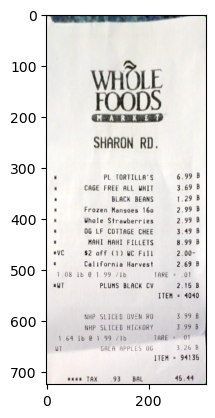

In [23]:
import cv2
from matplotlib import pyplot as plt
base_img = cv2.imread('cropped_image.jpg')
plt.imshow(base_img)

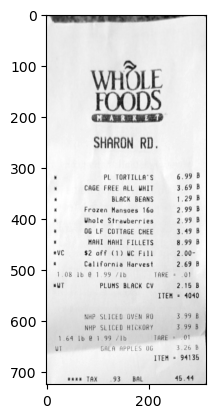

In [24]:
#gray img
gray_img = cv2.cvtColor(base_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,cmap='gray')

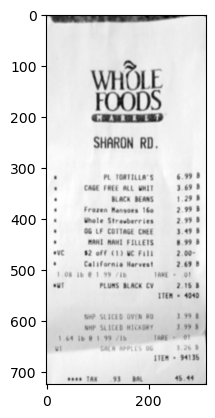

In [25]:
#remove noise applying gaussian
gaussian_blurred = cv2.GaussianBlur(gray_img, (5, 5), 0)
plt.imshow(gaussian_blurred,cmap='gray')

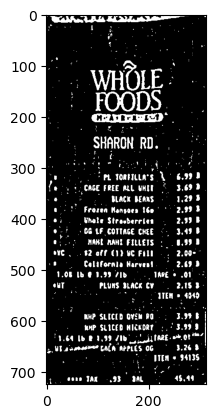

In [26]:
thres = cv2.adaptiveThreshold(gaussian_blurred,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 2)
plt.imshow(thres,cmap='gray')

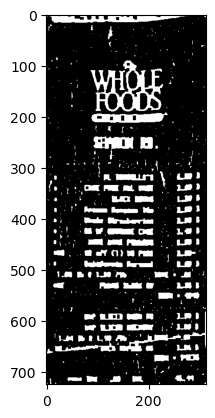

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morphed = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, kernel)
plt.imshow(morphed,cmap='gray')

Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: hilt

Extracted Text: EK:

Extracted Text: TAX

Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: Bo 2h

Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: bo

Extracted Text: Vit

Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: NH}

Extracted Text: 
Extracted Text: BL ICEL

Extracted Text: YY

Extracted Text: 
Extracted Text: 
Extracted Text: NH

Extracted Text: 6 YY

Extracted Text: 
Extracted Text: Wel

Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Text: 
Extracted Te

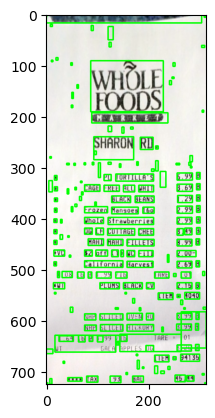

In [28]:
contours,_ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours)
dup = base_img.copy()
import pytesseract

# Tesseract OCR path
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w > 2 and h >2:
        roi = dup[y:y+h, x:x+w]
        cv2.rectangle(dup,(x,y), (x + w, y + h),(0,255,0),2)
        text = pytesseract.image_to_string(roi)
        print(f"Extracted Text: {text}")
plt.imshow(dup,cmap='gray')

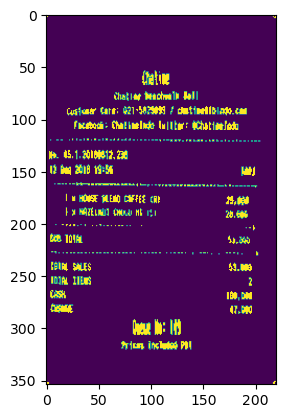

In [60]:
# Performing OTSU threshold 
ret, thresh1 = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# visualize the thresholded image
plt.imshow(thresh1)

In [61]:
# dilation parameter , bigger means less rect
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# Creating a copy of the image, you can use a binary image as well 
im2 = gray_img.copy()

cnt_list=[]
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Drawing a rectangle on the copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.circle(im2,(x,y),8,(255,255,0),8)

    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]

    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(thresh1)
    extract_Text(text)
    cnt_list.append([x,y,text])

In [22]:
def extract_Text(d):
    n_boxes = len(d['text'])
    print(f'box:{n_boxes}')
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
            img = cv2.putText(img, d['text'][i], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1) #Plotting texts on top of box
            print(d['text'][i])
            
    plt.imshow(img)

In [62]:
sorted_list = sorted(cnt_list, key=lambda x: x[1])
sorted_list

[[204, 0, ''],
 [0, 0, ''],
 [0,
  42,
  'Gratin\naig tc Bl\nstn ae SR at\n\net. cn\nFock hate latter hat ano\n\nhe. 20228\na a 208 198\n\n1 se END CFE aan\n\n1 au ac 6) Br)\nce vm sm\na sues 00\ni Tes 2\ni ro\nome\n\n'],
 [60, 280, ''],
 [205, 339, ''],
 [0, 339, '']]

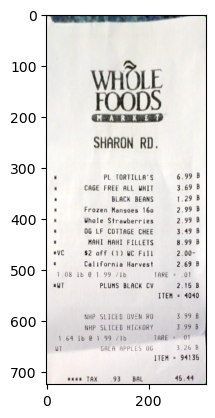

In [45]:
import cv2
import json
from matplotlib import pyplot as plt
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'
img = cv2.imread("cropped_image.jpg")
plt.imshow(img)

In [46]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


box:172
 
FOODS
SHARON
RD.
PL
TORTILLA’S
CAGE
FREE
ALL
WHIT
BLACK
BEANS
Frozen
160
Uhole
Strauberries
OG
LF
COTTAGE
CHEE
WAHT
FILLETS
$2
off
(1)
UC
Fill
California
Harvest
1.08
TARE
=
PLUMS
BLACK
CV
NHP
SLICED
OVEN
RO
NHP
SLICED
HICKORY
1.64
1b
/Ib
TARE
GALA
APPLES
OG
3
99
69
29
99
99
49
99
00-
69
B
15
B
4040
26
B
ITEM
=
94135
BAL
45.44


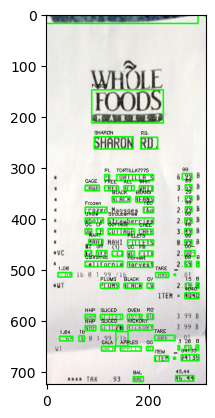

In [47]:
boxes_data = []
n_boxes = len(d['text'])
print(f'box:{n_boxes}')
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
        box_info = {
            "text": d['text'][i],
            "confidence": int(d['conf'][i]),
            "bounding_box": {"x": x, "y": y, "width": w, "height": h}
        }
        boxes_data.append(box_info)
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
        img = cv2.putText(img, d['text'][i], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1) #Plotting texts on top of box
        print(d['text'][i])

with open("boxes_data.json", "w") as json_file:
    json.dump(boxes_data, json_file, indent=4)
plt.imshow(img)

In [44]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image
import numpy as np
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

'0 1'

In [ ]:
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('ucaslcl/GOT-OCR2_0', trust_remote_code=True)
model = AutoModel.from_pretrained('ucaslcl/GOT-OCR2_0', trust_remote_code=True, low_cpu_mem_usage=True, device_map='cuda', use_safetensors=True, pad_token_id=tokenizer.eos_token_id)
model = model.eval().cuda()
image_file = '/content/drive/MyDrive/Projects/PharmacyReceipt.jpg'


res = model.chat(tokenizer, image_file, ocr_type='ocr')

print(res)